<a href="https://colab.research.google.com/github/XGHouFTW/py-cryptopredict/blob/main/LSTM_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/MyDrive
                   Date  BTC-ChangeFactor  ETH-ChangeFactor  \
0    2020-01-31 0:00:00          0.983406          0.975226   
1    2020-02-01 0:00:00          1.004977          1.019766   
2    2020-02-02 0:00:00          0.995159          1.027706   
3    2020-02-03 0:00:00          0.994525          1.006668   
4    2020-02-04 0:00:00          0.987961          0.996781   
..                  ...               ...               ...   
727  2022-01-27 0:00:00          1.008044          0.982090   
728  2022-01-28 0:00:00          1.017665          1.051802   
729  2022-01-29 0:00:00          1.009462          1.019828   
730  2022-01-30 0:00:00          0.993858          1.001886   
731  2022-01-31 0:00:00          1.014843          1.032657   

     DOGE-ChangeFactor  BTC-Open-EMA7  BTC-High-EMA7  BTC-Low-EMA7  \
0             0.981148    9508.313477    9521.706055   9230.776367   
1             1.012965    9467.824463    9501.110352   9251.392090   
2    

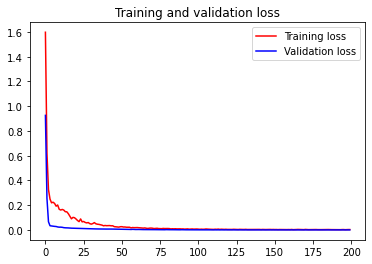

<Figure size 432x288 with 0 Axes>

(572,) (144,)
Train data RMSE:  0.025554046516645133
Train data MSE:  0.0006530092933748632
Train data MAE:  0.020021200314556623
-------------------------------------------------------------------------------------
Test data RMSE:  0.016487316004260916
Test data MSE:  0.0002718315890243582
Test data MAE:  0.013386402247463854
Train data R2 score: -1.788203930973594
Test data R2 score: -0.6338287309619899
Train data MGD:  0.0006557352069706957
Test data MGD:  0.00027508889332863686
----------------------------------------------------------------------
Train data MPD:  0.0006542314286006341
Test data MPD:  0.0002734402226410458
(716, 15, 191) (716,)
Epoch 1/200
18/18 [==============================] - 4s 64ms/step - loss: 0.8504 - accuracy: 0.0000e+00 - val_loss: 0.2050 - val_accuracy: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 1s 45ms/step - loss: 0.2838 - accuracy: 0.0000e+00 - val_loss: 0.0393 - val_accuracy: 0.0000e+00
Epoch 3/200
18/18 [========================

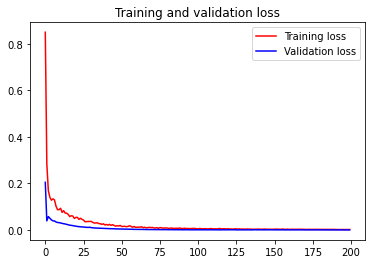

<Figure size 432x288 with 0 Axes>

(572,) (144,)
Train data RMSE:  0.021229470885032155
Train data MSE:  0.000450690434058428
Train data MAE:  0.016299864508189866
-------------------------------------------------------------------------------------
Test data RMSE:  0.019342924528277988
Test data MSE:  0.00037414872930665823
Test data MAE:  0.01544010350828569
Train data R2 score: -0.14516141022765838
Test data R2 score: -0.7099430659593147
Train data MGD:  0.0004489534841900472
Test data MGD:  0.0003783256711202338
----------------------------------------------------------------------
Train data MPD:  0.0004497142695827167
Test data MPD:  0.00037620654957420024
(716, 15, 191) (716,)
Epoch 1/200
18/18 [==============================] - 3s 68ms/step - loss: 0.5464 - accuracy: 0.0000e+00 - val_loss: 0.0424 - val_accuracy: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 1s 48ms/step - loss: 0.2897 - accuracy: 0.0000e+00 - val_loss: 0.1493 - val_accuracy: 0.0000e+00
Epoch 3/200
18/18 [=======================

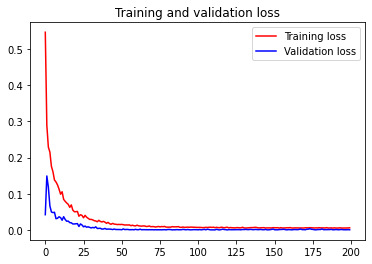

<Figure size 432x288 with 0 Axes>

(572,) (144,)
Train data RMSE:  0.07027424883608963
Train data MSE:  0.0049384700494766445
Train data MAE:  0.032370704789993564
-------------------------------------------------------------------------------------
Test data RMSE:  0.025594983440363824
Test data MSE:  0.0006551031773124983
Test data MAE:  0.02111175823155326
Train data R2 score: -0.0647949383601405
Test data R2 score: -1.656418937889823
Train data MGD:  0.003950590540421976
Test data MGD:  0.000638449272064341
----------------------------------------------------------------------
Train data MPD:  0.004379183387391765
Test data MPD:  0.0006465901933728526
(716, 15, 191) (716,)
Epoch 1/200
18/18 [==============================] - 3s 64ms/step - loss: 2.2697 - accuracy: 0.0000e+00 - val_loss: 1.8324 - val_accuracy: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 1s 47ms/step - loss: 0.9628 - accuracy: 0.0000e+00 - val_loss: 0.6356 - val_accuracy: 0.0000e+00
Epoch 3/200
18/18 [==============================

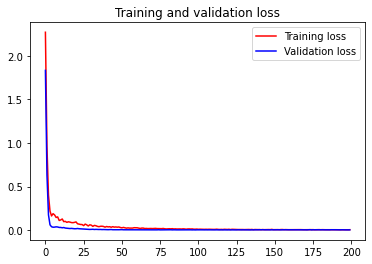

<Figure size 432x288 with 0 Axes>

(572,) (144,)
Train data RMSE:  0.0654840527851064
Train data MSE:  0.004288161169162601
Train data MAE:  0.04934675598850379
-------------------------------------------------------------------------------------
Test data RMSE:  0.062401176531053475
Test data MSE:  0.003893906832459699
Test data MAE:  0.04734249339585453
Train data R2 score: -1.4528958693023006
Test data R2 score: -2.573064783443722
Train data MGD:  0.004652794773589776
Test data MGD:  0.004214111829874949
----------------------------------------------------------------------
Train data MPD:  0.004458828219645971
Test data MPD:  0.004048315963672357
(716, 15, 191) (716,)
Epoch 1/200
18/18 [==============================] - 4s 67ms/step - loss: 2.6834 - accuracy: 0.0000e+00 - val_loss: 1.2015 - val_accuracy: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 1s 49ms/step - loss: 1.2744 - accuracy: 0.0000e+00 - val_loss: 0.3462 - val_accuracy: 0.0000e+00
Epoch 3/200
18/18 [==============================] - 1

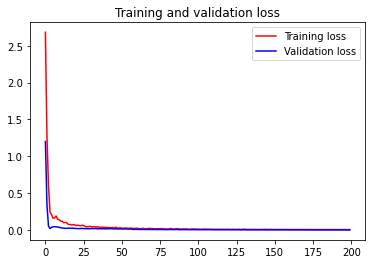

<Figure size 432x288 with 0 Axes>

(572,) (144,)
Train data RMSE:  0.0645822617581416
Train data MSE:  0.004170868533797118
Train data MAE:  0.04533227742765906
-------------------------------------------------------------------------------------
Test data RMSE:  0.04537912666656663
Test data MSE:  0.002059265137020298
Test data MAE:  0.034876140840998715
Train data R2 score: -0.3461721143993812
Test data R2 score: -0.20450975525728676
Train data MGD:  0.0043516445714956034
Test data MGD:  0.0020703644588878634
----------------------------------------------------------------------
Train data MPD:  0.004245482831062096
Test data MPD:  0.00206367850834108
(716, 15, 191) (716,)
Epoch 1/200
18/18 [==============================] - 4s 65ms/step - loss: 1.5042 - accuracy: 0.0000e+00 - val_loss: 0.3421 - val_accuracy: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 1s 47ms/step - loss: 0.6222 - accuracy: 0.0000e+00 - val_loss: 0.0660 - val_accuracy: 0.0000e+00
Epoch 3/200
18/18 [==============================] 

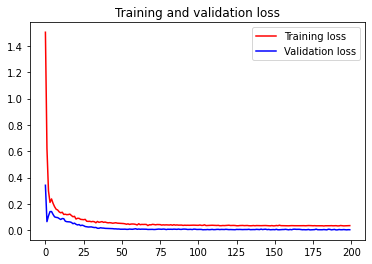

<Figure size 432x288 with 0 Axes>

(572,) (144,)
Train data RMSE:  0.1796544212358706
Train data MSE:  0.03227571106959563
Train data MAE:  0.0648274213098243
-------------------------------------------------------------------------------------
Test data RMSE:  0.06654875638727588
Test data MSE:  0.004428736976692993
Test data MAE:  0.05432216156718415
Train data R2 score: -0.008746870234653148
Test data R2 score: -0.9392017304581413
Train data MGD:  0.015910122992169644
Test data MGD:  0.0042543385812151314
----------------------------------------------------------------------
Train data MPD:  0.02105248884506013
Test data MPD:  0.0043368655045827225


In [1]:
# -*- coding: utf-8 -*-
"""LSTMPredictor.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1snuaWc20AeWGvnrBaj0MKyRIcmX3l6jS
"""

# !pip install ipdb
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import pickle

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Mount Google Drive
from google.colab import drive
drive.mount('/content/MyDrive')

def main(filepath: str, filename: str, prediction_columns: list, time_step: int = 10, num_units: int = 128, batch_size: int = 32):

    maindf = pd.read_csv(filename)

    describe_dataframe(maindf)

    maindf = preprocess_dataset(maindf)

    # convert an array of values into a dataset matrix


    """
    columns = ['index', 'Date', 'BTC_Open', 'BTC_Close', 'BTC_Volume', 'BTC_change_factor', 
    'ETH_Open', 'ETH_Close', 'ETH_Volume', 'ETH_change_factor', 'DOGE_Open', 'DOGE_Close',
    'DOGE_Volume', 'DOGE_change_factor', 'btc_newsPosScoreaverage', 'btc_newsNegScoreaverage',
    'btc_newsComScoreaverage', 'btc_newsScorecount', 'eth_newsPosScoreaverage', 
    'eth_newsNegScoreaverage', 'eth_newsComScoreaverage', 'eth_newsScorecount', 
    'doge_newsPosScoreaverage', 'doge_newsNegScoreaverage', 'doge_newsComScoreaverage', 
    'doge_newsScorecount', 'cryptocurrency_newsPosScoreaverage', 'cryptocurrency_newsNegScoreaverage', 
    'cryptocurrency_newsComScoreaverage', 'cryptocurrency_newsScorecount', 'economy_newsPosScoreaverage', 
    'economy_newsNegScoreaverage', 'economy_newsComScoreaverage', 'economy_newsScorecount',
    'finance_newsPosScoreaverage', 'finance_newsNegScoreaverage', 'finance_newsComScoreaverage', 
    'finance_newsScorecount', 'politics_newsPosScoreaverage', 'politics_newsNegScoreaverage', 
    'politics_newsComScoreaverage', 'politics_newsScorecount', 'pandemic_newsPosScoreaverage', 
    'pandemic_newsNegScoreaverage', 'pandemic_newsComScoreaverage', 'pandemic_newsScorecount', 
    'btc_redditPosScoreaverage', 'btc_redditNegScoreaverage', 'btc_redditComScoreaverage', 
    'btc_redditScorecount', 'eth_redditPosScoreaverage', 'eth_redditNegScoreaverage', 
    'eth_redditComScoreaverage', 'eth_redditScorecount', 'doge_redditPosScoreaverage', 
    'doge_redditNegScoreaverage', 'doge_redditComScoreaverage', 'doge_redditScorecount', 
    'cryptocurrency_redditPosScoreaverage', 'cryptocurrency_redditNegScoreaverage', 
    'cryptocurrency_redditComScoreaverage', 'cryptocurrency_redditScorecount', 
    'economy_redditPosScoreaverage', 'economy_redditNegScoreaverage', 
    'economy_redditComScoreaverage', 'economy_redditScorecount', 'finance_redditPosScoreaverage', 
    'finance_redditNegScoreaverage', 'finance_redditComScoreaverage', 'finance_redditScorecount', 
    'politics_redditPosScoreaverage', 'politics_redditNegScoreaverage', 'politics_redditComScoreaverage', 
    'politics_redditScorecount', 'pandemic_redditPosScoreaverage', 'pandemic_redditNegScoreaverage', 
    'pandemic_redditComScoreaverage', 'pandemic_redditScorecount']
    """
    columns = list(maindf.columns)[1:]

    for prediction_column in prediction_columns:
        X, y = create_dataset(maindf, columns, prediction_column, time_step)
        print(np.shape(X), np.shape(y))
        X_train, X_test, y_train, y_test = traintest_split(X, y)

        input_shape = (None, len(X[0][0]))

        # model.add(LSTM(128, "relu", dropout=.2, recurrent_dropout=0.2, input_shape=(None, len(X_train[0][0])))
        # model.add(LSTM(time_step, input_dim=len(X_train[0][0]), activation="relu"))

        """
        units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
        bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
        recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
        kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, 
        dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, 
        go_backwards=False, stateful=False,
        """

        model = Sequential()
        model.add(LSTM(num_units, dropout=0.2, recurrent_dropout=0.2, input_shape=input_shape))
        model.add(Dense(1))

        model.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.Accuracy()])
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=batch_size,
                              verbose=1)
        
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs = range(len(loss))

        plt.plot(epochs, loss, 'r', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend(loc=0)
        plt.figure()

        plt.show()


        pad = np.zeros(time_step-1)

        train_predict1 = model.predict(X_train).reshape(len(X_train))
        test_predict1 = model.predict(X_test).reshape(len(X_test))
        print(train_predict1.shape, test_predict1.shape)
        pred = np.concatenate((pad, train_predict1, test_predict1), axis=None)
        maindf[prediction_column+"-prediction"] = pd.DataFrame(pred) 

        maindf.to_csv(filename, index = False)
        
        # Evaluation metrices RMSE and MAE
        print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train, train_predict1)))
        print("Train data MSE: ", mean_squared_error(y_train, train_predict1))
        print("Train data MAE: ", mean_absolute_error(y_train, train_predict1))
        print("-------------------------------------------------------------------------------------")
        print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test, test_predict1)))
        print("Test data MSE: ", mean_squared_error(y_test, test_predict1))
        print("Test data MAE: ", mean_absolute_error(y_test, test_predict1))

        """- ## Variance Regression Score"""
        # print("Train data explained variance regression score:",
              # explained_variance_score(y, pred[20:]))

        """- ## R square score for regression"""

        print("Train data R2 score:", r2_score(y_train, train_predict1))
        print("Test data R2 score:", r2_score(y_test, test_predict1))

        """- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)"""

        print("Train data MGD: ", mean_gamma_deviance(y_train, train_predict1))
        print("Test data MGD: ", mean_gamma_deviance(y_test, test_predict1))
        print("----------------------------------------------------------------------")
        print("Train data MPD: ", mean_poisson_deviance(y_train, train_predict1))
        print("Test data MPD: ", mean_poisson_deviance(y_test, test_predict1))

    return True

def traintest_split(X: np.array, y: np.array, split: float = 0.8):
    train_size = int(split*len(X))
    X_train = X[:train_size]
    X_test = X[train_size:]

    y_train = y[:train_size]
    y_test = y[train_size:]

    return X_train, X_test, y_train, y_test

def preprocess_dataset(df):
    df.replace(to_replace=np.nan, value=0.0, inplace=True)
    print(df.shape)
    # normalize_dataset(df)
    return df

def create_dataset(dataset: pd.DataFrame, columns_X: list, column_Y: str, time_step=1):

    # create x and y datasets, to be passed into model
    # 
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        # The daily subset ranges from the index up until index + timestep -1
          # Becaus
        daily_subset = dataset.loc[i:(i + time_step - 1), columns_X]
        dataX.append(daily_subset)
        dataY.append(dataset.loc[i + time_step, column_Y])
    return np.array(dataX), np.array(dataY)

def normalize_dataset(data: pd.DataFrame):
    columns = list(data.columns)
    for column in columns[1:]:
        data[column] = normalize_column(data[column])

def normalize_column(column: pd.Series) -> pd.Series:
    STD = np.std(column)
    mean = np.mean(column)
    column = column.apply(lambda x: (x - mean) / STD)
    return column

def describe_dataframe(df: pd.DataFrame):
    print(df)

    print('Total number of days present in the dataset: ', df.shape[0])
    print('Total number of fields present in the dataset: ', df.shape[1])

    print(df.shape,

    df.head(),

    df.tail(),

    df.info(),

    df.describe(),

    df.columns)

    print('\n\n\nNull Values:', df.isnull().values.sum())

    print('\n\n\nNA values:', df.isnull().values.any(), "\n\n\n")

if __name__=="__main__":

    # script, filepath, currencies = sys.argv
    # currencies = currencies.split()
    filename = '/content/MyDrive/MyDrive/ISEF/Datasets/MergedPriceDataEMA7.csv'
    filepath = '/content/MyDrive/MyDrive/ISEF/Datasets'
    # drive.mount('/content/MyDrive')

    # filepath = './'
    # filename = './MergedPriceDataEMA.csv'
    prediction_columns = [
        'BTC-ChangeFactor-EMA7',
        'ETH-ChangeFactor-EMA7',
        'DOGE-ChangeFactor-EMA7',
        'BTC-ChangeFactor',
        'ETH-ChangeFactor',
        'DOGE-ChangeFactor'
    ]

    main(filepath, filename, prediction_columns, time_step = 15)

In [ ]:
a = [1, 2, 3, 4, 5]
a[1:3]